### WordCloud for tweet text retrieved for Mental Anxiety text keyword

In [1]:
import TweetUtils
import numpy as np
import pandas as pd
from os import path
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import json
import Utils
%matplotlib inline

In [47]:
def generate_word_cloud(data):
    data["full_text"]  = data["full_text"].apply(lambda tweet: TweetUtils.process_tweet(tweet))
    all_tweets_text =  " ".join(tweet for tweet in data.loc[:, "full_text"])
    stopwords = set(STOPWORDS)
    stopwords.update(["covid", "covid-19", "corona", "pandemic"])
    # plt.figure(figsize=(800, 400))
    wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(all_tweets_text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [14]:
# read df from pickle
PICKLE_FILE = "df_april_10Kph_All.pkl"
df = pd.read_pickle(PICKLE_FILE)

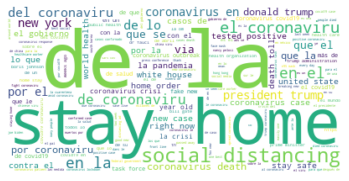

In [4]:
generate_word_cloud(df)

### Get only Mental anxiety keyword tweets

In [46]:
df_anxiety = df.copy()
words = TweetUtils.get_anxiety_words()
# print(words)
df_anxiety.head()
df_anxiety  = df_anxiety.loc[df_anxiety["full_text"].str.contains('|'.join(words))]
df_anxiety.head()

,created_at,full_text,geo,coordinates,place,contributors,lang
69,2020-04-05 21:56:17+00:00,Covid-19 shows how sick we Americans are #Medi...,None,None,None,NaN,en
90,2020-04-05 21:59:31+00:00,RT @cvpayne: A husband and wife I know got cor...,None,None,None,NaN,en
117,2020-04-05 21:14:06+00:00,RT @rosadiezglez: A día de hoy 12418 españoles...,None,None,None,NaN,es
138,2020-04-05 21:35:15+00:00,RT @SenSanders: It is insane that our nurses a...,None,None,None,NaN,en
148,2020-04-05 21:37:57+00:00,"@vitu_joao esse nego ney é foda, ele que é o p...",None,None,None,NaN,pt


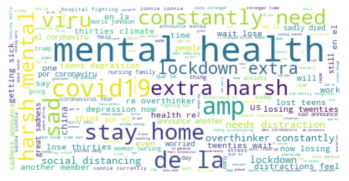

In [48]:
generate_word_cloud(df_anxiety)

In [57]:
%matplotlib inline

### Time Series plot

In [ ]:
!pip install textblob

In [50]:
from textblob import TextBlob

In [51]:
df_anxiety["polarity"] = df_anxiety.full_text.apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

In [18]:
df_anxiety.columns

Index(['created_at', 'full_text', 'geo', 'coordinates', 'place',
       'contributors', 'lang', 'polarity'],
      dtype='object')

In [52]:
df_anxiety.sample(10)["full_text"].iloc[0]

"being in a #lockdown can be felt as #suffering. let's not forget that birth, our life, being sick, being beautiful, being just, being a great man (women) are suffering. suffering is an affect in our emotional life."

In [56]:
df_anxiety.head(1)

,created_at,full_text,geo,coordinates,place,contributors,lang,polarity
69,2020-04-05 21:56:17+00:00,covid-19 shows how sick we americans are #medi...,None,None,None,NaN,en,-0.714286
